In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(50)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [65]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [67]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [68]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [69]:
dept_dummies=pd.get_dummies(df.sales, prefix="Dept")
salary_dummies=pd.get_dummies(df.salary, prefix="Salary")
df=pd.concat([df, dept_dummies.astype(int), salary_dummies.astype(int)], axis=1)


In [70]:
df = df.drop(["sales", "salary"], axis=1)

In [71]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Dept_IT                    int32
Dept_RandD                 int32
Dept_accounting            int32
Dept_hr                    int32
Dept_management            int32
Dept_marketing             int32
Dept_product_mng           int32
Dept_sales                 int32
Dept_support               int32
Dept_technical             int32
Salary_high                int32
Salary_low                 int32
Salary_medium              int32
dtype: object

# 2.1.	Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

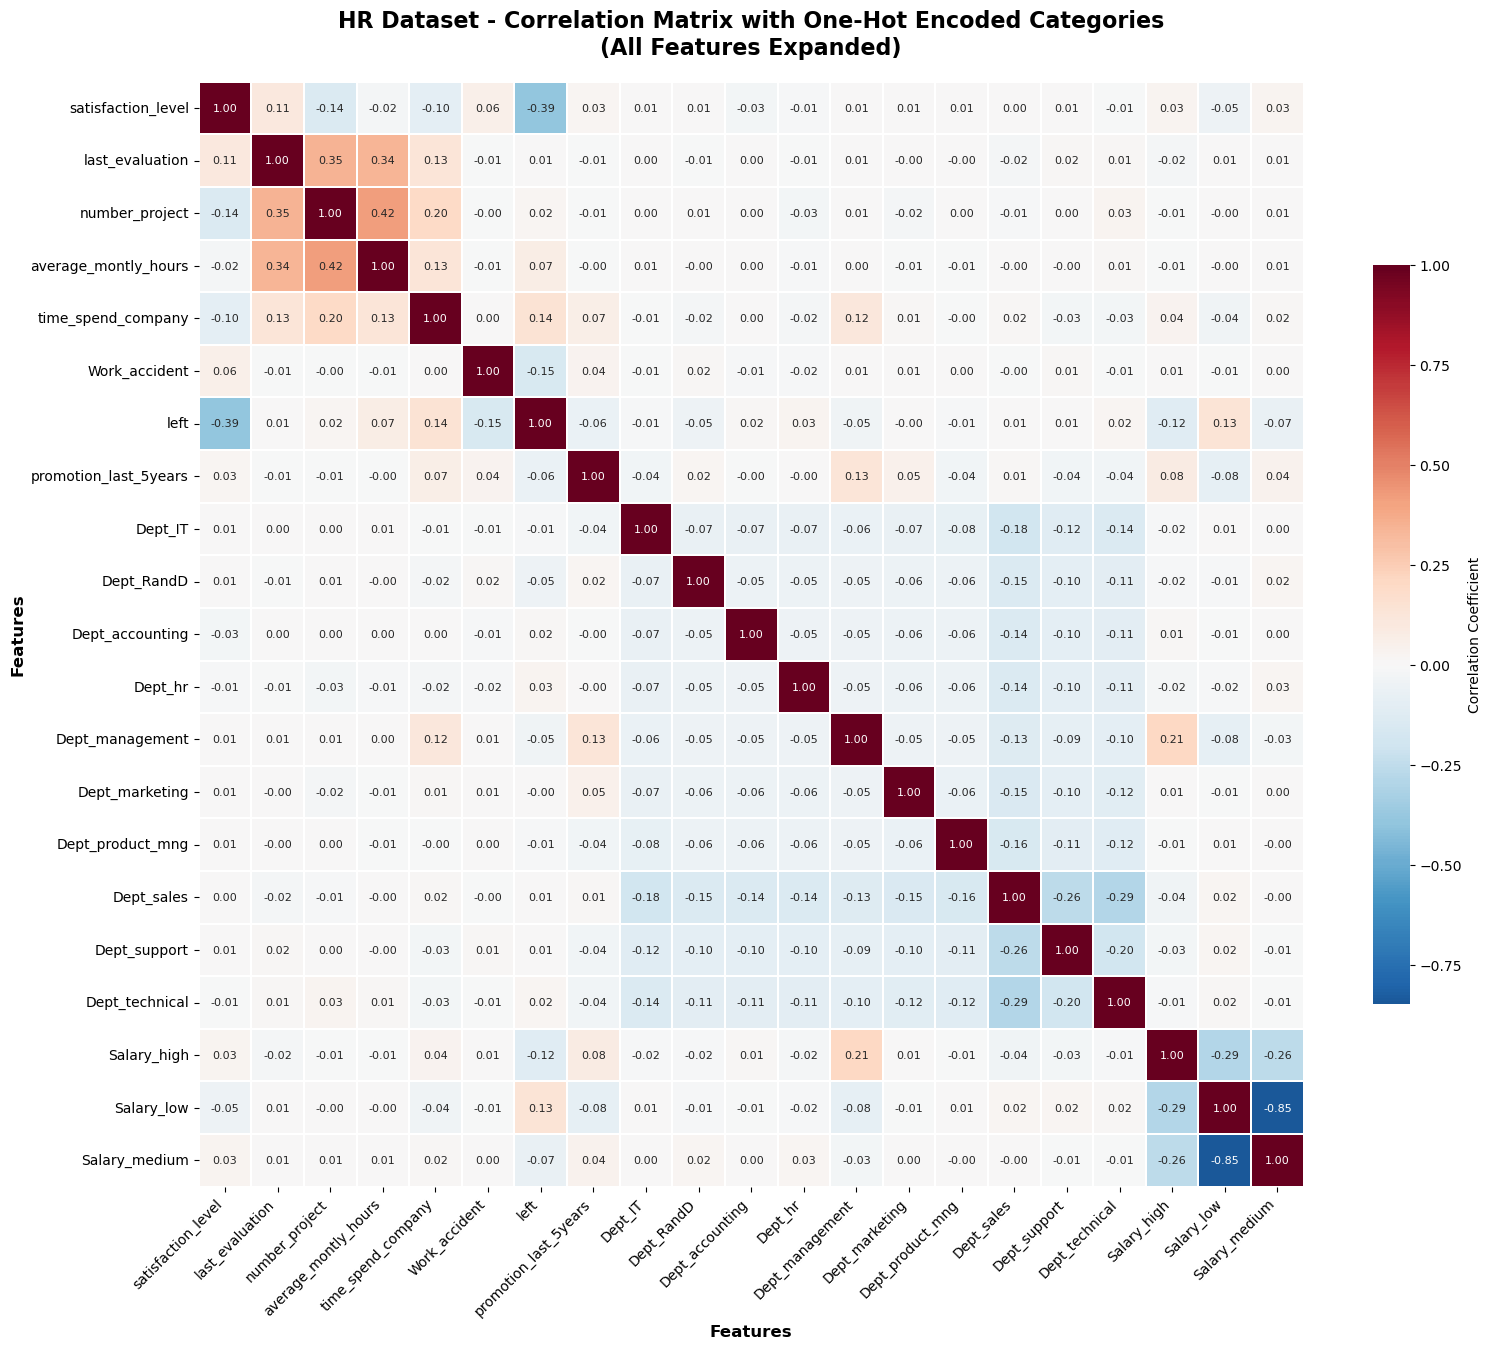

In [75]:

# Calculate correlation matrix for one-hot encoded version
correlation_matrix_onehot = df.corr()

# Create second heatmap for one-hot encoded version
plt.figure(figsize=(16, 14))

sns.heatmap(correlation_matrix_onehot, 
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.6},
            linewidths=0.3,
            annot_kws={'size': 8})

plt.title('HR Dataset - Correlation Matrix with One-Hot Encoded Categories\n(All Features Expanded)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# 2.2.	Draw the distribution plot of:
###	Employee Satisfaction (use column satisfaction_level)
###	Employee Evaluation (use column last_evaluation)
###	Employee Average Monthly Hours (use column average_montly_hours)


Text(0.5, 1.0, 'Average Montly Hours')

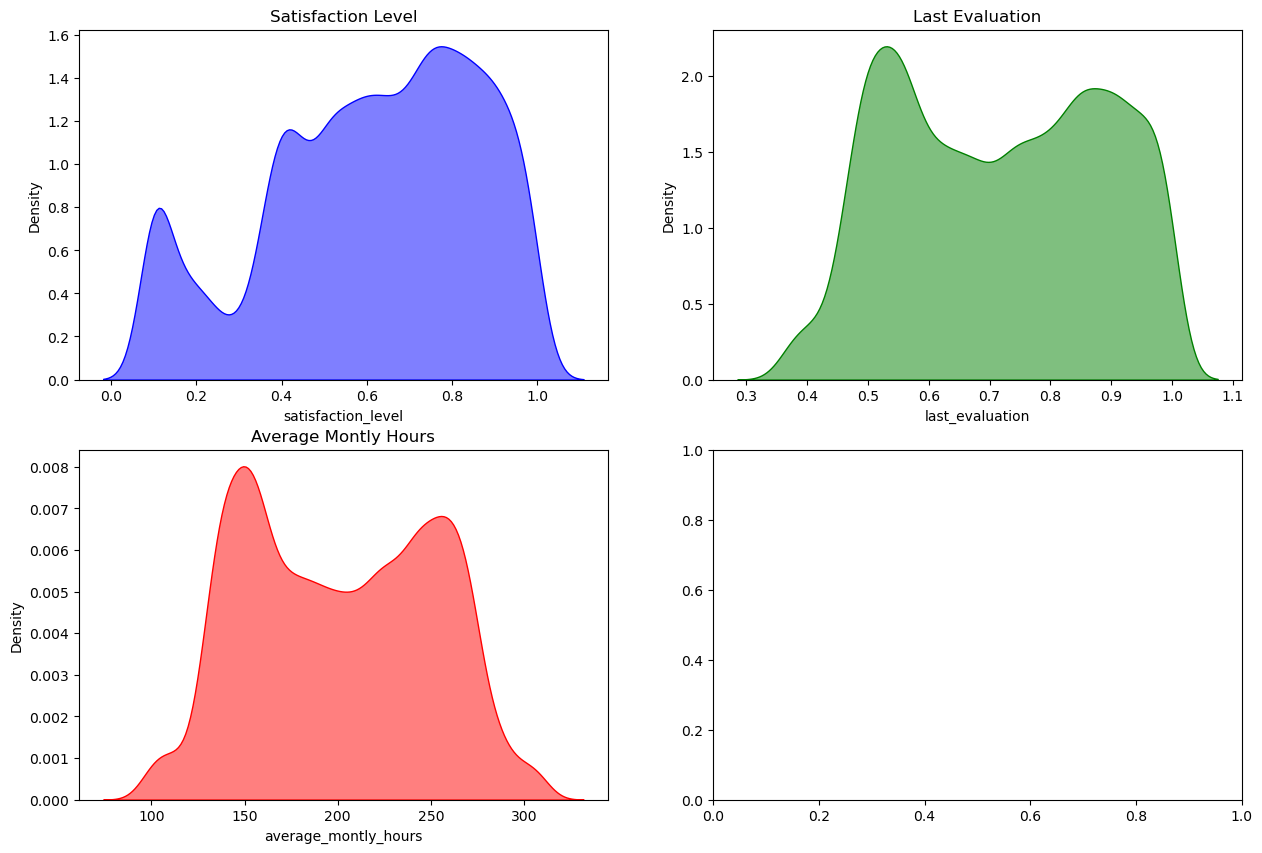

In [73]:
# Distribution Plot

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot on each subplot
sns.kdeplot(df["satisfaction_level"], ax=axes[0, 0], color="blue", fill=True, alpha=0.5)
axes[0, 0].set_title("Satisfaction Level")

sns.kdeplot(df["last_evaluation"], ax=axes[0, 1], color="green", fill=True, alpha=0.5)
axes[0, 1].set_title("Last Evaluation")

sns.kdeplot(df["average_montly_hours"], ax=axes[1, 0], color="red", fill=True, alpha=0.5)
axes[1, 0].set_title("Average Montly Hours")

# 2.3.	Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.
### People with 3 & 4 project stayed with company
### People with 2, 5 & 6, 7 projects left the most

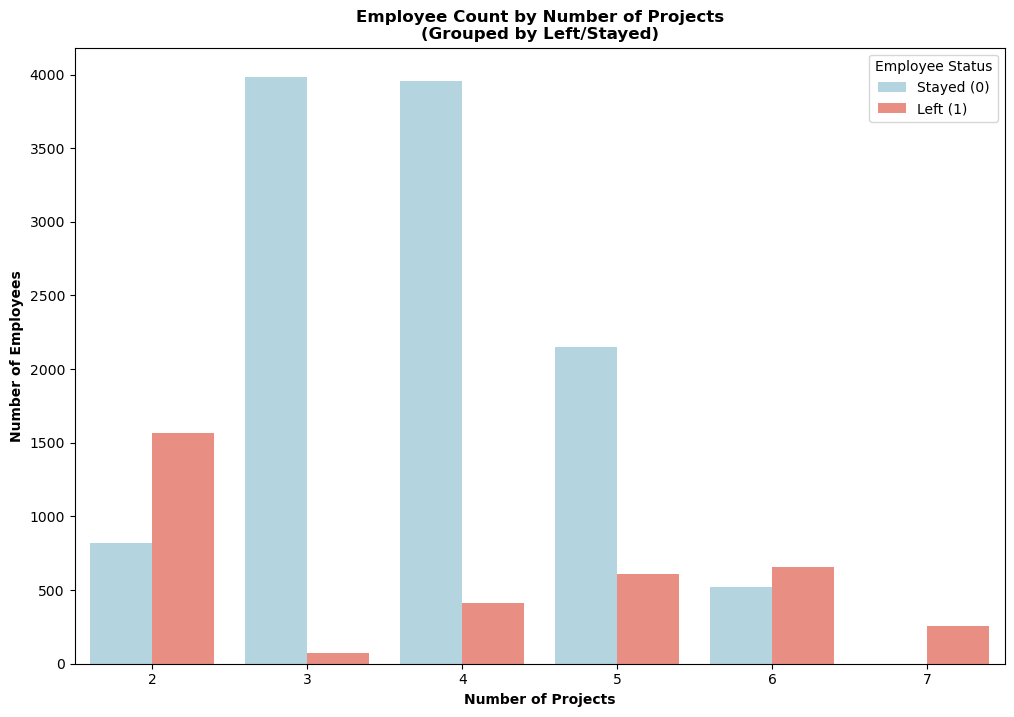

In [81]:
# Create the bar plot
plt.figure(figsize=(12, 8))

# Method 1: Using seaborn countplot with hue
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='number_project', hue='left', palette=['lightblue', 'salmon'])
plt.title('Employee Count by Number of Projects\n(Grouped by Left/Stayed)', fontweight='bold', fontsize=12)
plt.xlabel('Number of Projects', fontweight='bold')
plt.ylabel('Number of Employees', fontweight='bold')
plt.legend(['Stayed (0)', 'Left (1)'], title='Employee Status')

# 3.	Perform clustering of employees who left based on their satisfaction and evaluation.
### 3.1.	Choose columns satisfaction_level, last_evaluation, and left.
### 3.2.	Do K-means clustering of employees who left the company into 3 clusters?
### 3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


In [83]:
# Step 3.1: Choose columns satisfaction_level, last_evaluation, and left
selected_columns = ['satisfaction_level', 'last_evaluation', 'left']
df_selected = df[selected_columns].copy()

# Filter for employees who left (left = 1)
employees_left = df_selected[df_selected['left'] == 1].copy()
print(f"\nEmployees who left: {len(employees_left)}")

# Remove the 'left' column for clustering (we only need satisfaction and evaluation)
clustering_data = employees_left[['satisfaction_level', 'last_evaluation']].copy()

print("\nClustering Data Overview:")
print(clustering_data.describe())
employees_left



Employees who left: 3571

Clustering Data Overview:
       satisfaction_level  last_evaluation
count         3571.000000      3571.000000
mean             0.440098         0.718113
std              0.263933         0.197673
min              0.090000         0.450000
25%              0.130000         0.520000
50%              0.410000         0.790000
75%              0.730000         0.900000
max              0.920000         1.000000


,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the features for better clustering
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(clustering_data_scaled)

In [85]:
# Add cluster labels to the original data
employees_left['cluster'] = cluster_labels
clustering_data['cluster'] = cluster_labels

In [87]:
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_scaled

array([[-0.10532339, -1.01620248],
       [ 1.39423261,  1.00332037],
       [-1.24585769,  0.77295566]])

In [89]:
# Plot 1: Scatter plot of clusters
ax1 = axes[0, 0]
colors = ['red', 'blue', 'green']
for cluster_id in range(3):
    cluster_data = employees_left[employees_left['cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id}:")
    print(f"  Number of employees: {len(cluster_data)}")
    print(f"  Percentage of left employees: {len(cluster_data)/len(employees_left)*100:.1f}%")
    print(f"  Satisfaction level: {cluster_data['satisfaction_level'].mean():.3f} (±{cluster_data['satisfaction_level'].std():.3f})")
    print(f"  Last evaluation: {cluster_data['last_evaluation'].mean():.3f} (±{cluster_data['last_evaluation'].std():.3f})")
    print(f"  Satisfaction range: {cluster_data['satisfaction_level'].min():.2f} - {cluster_data['satisfaction_level'].max():.2f}")
    print(f"  Evaluation range: {cluster_data['last_evaluation'].min():.2f} - {cluster_data['last_evaluation'].max():.2f}")


CLUSTER 0:
  Number of employees: 1667
  Percentage of left employees: 46.7%
  Satisfaction level: 0.412 (±0.067)
  Last evaluation: 0.517 (±0.048)
  Satisfaction range: 0.10 - 0.89
  Evaluation range: 0.45 - 0.78

CLUSTER 1:
  Number of employees: 965
  Percentage of left employees: 27.0%
  Satisfaction level: 0.808 (±0.077)
  Last evaluation: 0.916 (±0.069)
  Satisfaction range: 0.47 - 0.92
  Evaluation range: 0.63 - 1.00

CLUSTER 2:
  Number of employees: 939
  Percentage of left employees: 26.3%
  Satisfaction level: 0.111 (±0.047)
  Last evaluation: 0.871 (±0.065)
  Satisfaction range: 0.09 - 0.46
  Evaluation range: 0.62 - 1.00


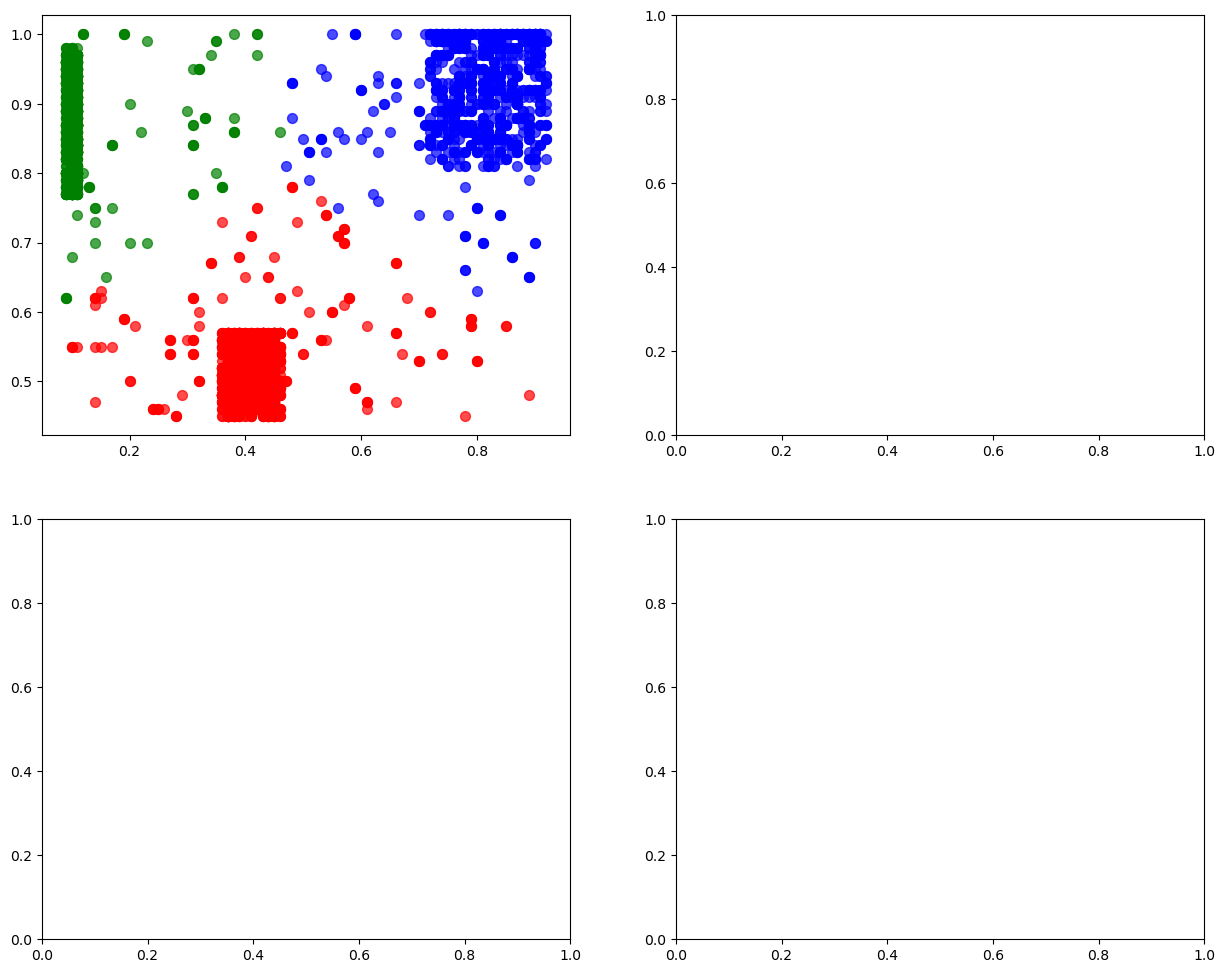

In [92]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot of clusters
ax1 = axes[0, 0]
colors = ['red', 'blue', 'green']
for cluster_id in range(3):
    cluster_data = clustering_data[clustering_data['cluster'] == cluster_id]
    ax1.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=50)

# 4.	Handle the left Class Imbalance using the SMOTE technique.
### 4.1.	Pre-process the data by converting categorical columns to numerical columns by:
###	Separating categorical variables and numeric variables
###	Applying get_dummies() to the categorical variables
###	Combining categorical variables and numeric variables
### 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
### 4.3.	Upsample the train dataset using the SMOTE technique from the imblearn module.


In [93]:
# get dummies at line 69
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Dept_IT,Dept_RandD,...,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Dept_IT                14999 non-null  int32  
 9   Dept_RandD             14999 non-null  int32  
 10  Dept_accounting        14999 non-null  int32  
 11  Dept_hr                14999 non-null  int32  
 12  Dept_management        14999 non-null  int32  
 13  Dept_marketing         14999 non-null  int32  
 14  Dept_product_mng       14999 non-null  int32  
 15  De

In [98]:
from sklearn.model_selection import train_test_split
x, xt, y, yt = train_test_split(
    df.drop(columns=["left"]), 
    df["left"], 
    test_size=.20, 
    random_state=123,
    stratify=df["left"]
)

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([9142, 2857], dtype=int64))

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

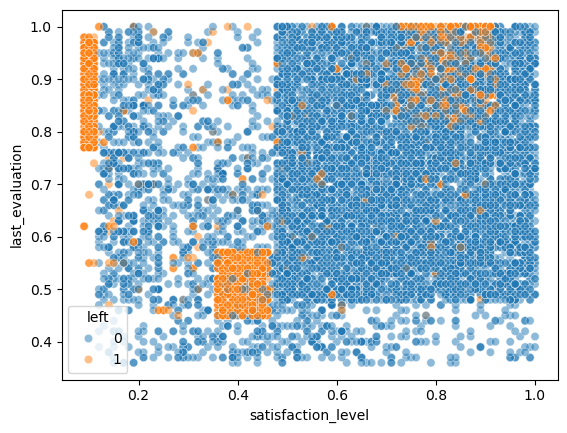

In [112]:
sns.scatterplot(
    x=x[x.columns[0]],  # First column by name
    y=x[x.columns[1]],  # Second column by name
    hue=y, 
    alpha=0.5
)

In [104]:
sm=SMOTE()

In [106]:
sm_X,sm_y=sm.fit_resample(x,y)

In [107]:
np.unique(sm_y,return_counts=True)

(array([0, 1], dtype=int64), array([9142, 9142], dtype=int64))

In [110]:
sm_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18284 entries, 0 to 18283
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     18284 non-null  float64
 1   last_evaluation        18284 non-null  float64
 2   number_project         18284 non-null  int64  
 3   average_montly_hours   18284 non-null  int64  
 4   time_spend_company     18284 non-null  int64  
 5   Work_accident          18284 non-null  int64  
 6   promotion_last_5years  18284 non-null  int64  
 7   Dept_IT                18284 non-null  int32  
 8   Dept_RandD             18284 non-null  int32  
 9   Dept_accounting        18284 non-null  int32  
 10  Dept_hr                18284 non-null  int32  
 11  Dept_management        18284 non-null  int32  
 12  Dept_marketing         18284 non-null  int32  
 13  Dept_product_mng       18284 non-null  int32  
 14  Dept_sales             18284 non-null  int32  
 15  De

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

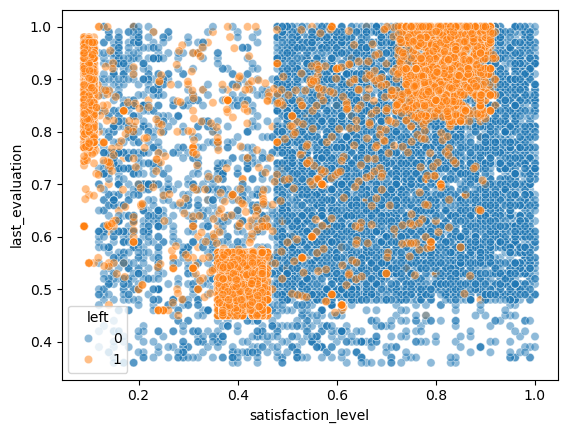

In [ ]:
sns.scatterplot(
    x=sm_X[sm_X.columns[0]],  # First column by name
    y=sm_X[sm_X.columns[1]],  # Second column by name
    hue=sm_y, 
    alpha=0.5
)